# Сверточные нейронные сети


## Импорт библиотек

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as pre
from sklearn.metrics import recall_score as rec
from sklearn.metrics import f1_score as f1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Проверим, то видеокарта доступна

In [8]:
print(f"Устройств CPU: {len(tf.config.list_physical_devices('CPU'))}")
print(f"Устройств GPU: {len(tf.config.list_physical_devices('GPU'))}")

Устройств CPU: 1
Устройств GPU: 1


Видим, что tensorflow видит 1 процессор и 1 видеокарта (графический процессор). По-умолчанию tensorflow будет использовать GPU для обучения

## Загрузка набора данных
Загрузка набора данных MNIST и разбиение его на обучающие и тестовые данные

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size = 10000,
 train_size = 60000,
 random_state = 123)

print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)
Shape of X test: (10000, 28, 28)
Shape of y test: (10000,)


## Предобработка данных
Как известно, в исходном наборе данных MNIST изображения представляются в виде
двумерных массивов размером 28 на 28 с целыми значениями интенсивности каждого
пикселя от 0 до 255. Хотя сверточные сети подходят для обработки данных в виде
двумерных массивов, тем не менее, данные все равно требуют изменения размерности.
Дело в том, что сверточный слой в Keras принимает на вход не просто двумерный
массив с размерностью (высота, ширина), а трехмерный массив с размерностью
(высота, ширина, количество каналов). Для цветных изображений количество каналов
равно 3 – по количеству цветов в модели RGB. Изображения в MNIST монохромные:
количество каналов равно 1. Поэтому для перевода изображений в корректную
размерность воспользуемся функцией **numpy.expand_dims** с параметром **axis** = -1. Эта функция добавляет размерность переданного ей массива данных.
Выходные значения (метки цифр) стандартно переведем в one-hot encoding.

In [3]:
# Зададим параметры данных и модели
num_classes = 10
input_shape = (28, 28, 1)
# Приведение входных данных к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255
# Расширяем размерность входных данных, чтобы каждое изображение имело
# размерность (высота, ширина, количество каналов)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)
# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (60000, 28, 28, 1)
Shape of transformed X test: (10000, 28, 28, 1)
Shape of transformed y train: (60000, 10)
Shape of transformed y test: (10000, 10)


## Реализация сверточной нейронной сети и оценка качества классификации.

Сверточная нейронная сеть состоит из слоев свертки и подвыборки (пуллинга).

Данные слои реализуются в Keras классами **Conv2D** и **MaxPooling2D**. Основными параметрами слоя **Conv2D** являются количество фильтров, размер фильтра, функция активации и др. Для первого слоя необходимо также указать входную размерность данных. Основным параметром слоя **MaxPooling2D** является размер окна пуллинга.

После нескольких слоев сверки и пуллинга в сверточной сети обычно добавляют один
или несколько полносвязных слоев (**Dense**) для классификации, подобно
многослойному персептрону. Между слоями, обрабатывающими многомерные
массивы, и полносвязными слоями необходимо добавить слой **Flatten**. Данный слой «вытянет» многомерный массив на выходе слоя пуллинга в одномерный вектор,
пригодный для подачи на полносвязный слой.

Также в глубоких сетях с целью регуляризации, предотвращения перевозбуждения
связей между нейронами, используют слой **Dropout**. Основным параметром данного
слоя является вероятность, с которой выходы случайных нейронов предыдущего слоя
будут обнулены, и обучение через которые проходить не будет.

Программный код для создания сверточной нейронной сети и вывода информации о ее
архитектуре может выглядеть следующим образом:

In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation="softmax"))
model.summary()


/home/sai/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1744795041.936939    5159 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6717 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

После того, как мы собрали модель, остается ее скомпилировать и обучить.
результаты обучения сохраним в объекте **history**.

In [ ]:
batch_size = 256
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/10


I0000 00:00:1744795048.767354    5366 service.cc:152] XLA service 0x7f157c004870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744795048.767389    5366 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2025-04-16 14:17:28.809747: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744795048.963010    5366 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-16 14:17:29.623584: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.7 = (f32[256,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[256,32,13,13]{3,2,1,0} %bitcast.4542, f32[64,32,3,3]{3,2,1,0} %bitcast.4080, f32[64]{0} %bitcast.4602), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBias

 27/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3358 - loss: 2.0497

I0000 00:00:1744795051.021839    5366 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


207/211 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6954 - loss: 0.9838

2025-04-16 14:17:32.602391: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.7 = (f32[240,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[240,32,13,13]{3,2,1,0} %bitcast.4542, f32[64,32,3,3]{3,2,1,0} %bitcast.4080, f32[64]{0} %bitcast.4602), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1_2/convolution" source_file="/home/sai/miniconda3/envs/tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}


211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6983 - loss: 0.9747

2025-04-16 14:17:34.217441: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.7 = (f32[256,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[256,32,13,13]{3,2,1,0} %bitcast.497, f32[64,32,3,3]{3,2,1,0} %bitcast.504, f32[64]{0} %bitcast.506), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1_2/convolution" source_file="/home/sai/miniconda3/envs/tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-16 14:17:34.620466: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially bu

211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6990 - loss: 0.9724 - val_accuracy: 0.9615 - val_loss: 0.1325
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9511 - loss: 0.1634 - val_accuracy: 0.9765 - val_loss: 0.0806
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9661 - loss: 0.1106 - val_accuracy: 0.9795 - val_loss: 0.0680
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9736 - loss: 0.0854 - val_accuracy: 0.9848 - val_loss: 0.0532
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9771 - loss: 0.0741 - val_accuracy: 0.9845 - val_loss: 0.0473
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9784 - loss: 0.0660 - val_accuracy: 0.9868 - val_loss: 0.0436
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9812 - loss: 0.0599 - val_accuracy: 0.9883 - val_loss: 0.0395
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9811 - loss: 0.0588 - val_accuracy: 0.9875 - val

После того, как модель обучена, оценка качества ее работы на тестовых данных может быть произведена с помощью функции **evaluate**. Функция вернет список, состоящий из значения функции ошибки и метрики качества на тестовых данных.


In [10]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print(f'Loss on test data: {scores[0]:.03f}')
print(f'Accuracy on test data: {scores[1]:.03f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9862 - loss: 0.0464
Loss on test data: 0.041
Accuracy on test data: 0.987


## Применение обученной модели
Для вывода результата обработки нейронной сетью одного изображения воспользуемся
функцией **predict**. Для определения результата распознавания необходимо
воспользоваться функцией **argmax**, то есть определить на каком месте стоит нейрон, выдающий наибольшее значение.

Обратите внимание, что при вызове функции predict на вход сети должен подаваться
массив, имеющий четыре размерности (количество примеров, высота, ширина,
количество каналов), поэтому следует воспользоваться срезом (slice) **X_test[n:n+1]**, а не просто **X_test[n]**, который бы был трехмерным массивом.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


2025-04-16 14:49:14.811065: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.7 = (f32[1,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,32,13,13]{3,2,1,0} %bitcast.186, f32[64,32,3,3]{3,2,1,0} %bitcast.193, f32[64]{0} %bitcast.195), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1_2/convolution" source_file="/home/sai/miniconda3/envs/tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}


NN output: [[9.99953032e-01 6.24489338e-13 7.50315863e-08 1.04084096e-10
  2.42486738e-12 3.06552488e-06 3.29164432e-05 8.90026768e-12
  1.08300201e-05 1.23894961e-09]]


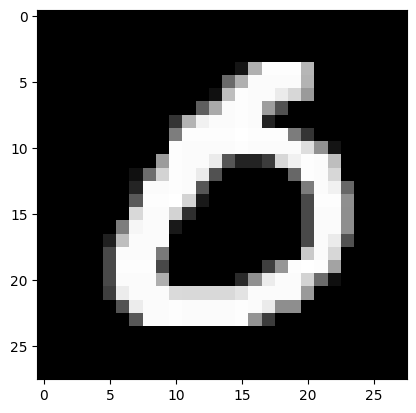

Real mark:  0
NN answer:  0


In [11]:
# вывод тестового изображения и результата распознавания
n = 1233
result = model.predict(X_test[n:n+1])
print('NN output:', result)
plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()
print('Real mark: ', np.argmax(y_test[n]))
print('NN answer: ', np.argmax(result))


##Вычисление показателей качества классификации
Для вычисления матрицы ошибок классификации, а также основанных на ней
показателей качества классификации **accuracy**, **precision**, **recall**, **F-score** требуются два массива: массив истинных и массив предсказанных (назначенных моделью) меток тестовых объектов.

Для вычисления указанных характеристик можно воспользоваться функциями из
пакета **sklearn**: **classification_report** и **confusion_matrix**. Массивы меток передаются им как входные параметры.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Accuracy:  0.987



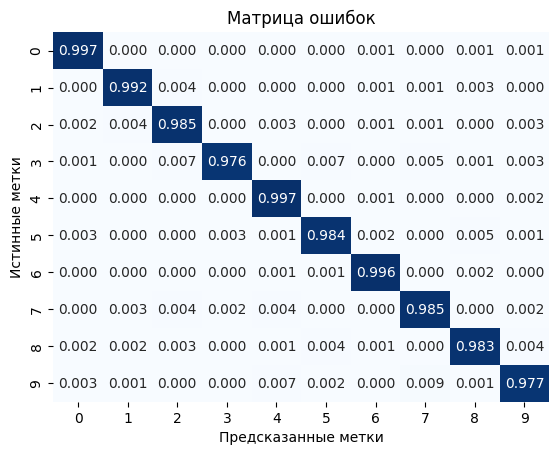

In [32]:
def print_metrics(true_labels, predicted_labels):
    print()
    print(f"Accuracy:  {acc(y_true=true_labels, y_pred=predicted_labels):.03f}")
    # print(f"Precision: {pre(y_true=true_labels, y_pred=predicted_labels):.03f}")
    # print(f"Recall:    {rec(y_true=true_labels, y_pred=predicted_labels):.03f}")
    # print(f"F1:        {f1(y_true=true_labels, y_pred=predicted_labels):.03f}")
    print()
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    sns.heatmap(conf_matrix, annot=True, fmt='.3f', cmap='Blues', cbar=False)
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')
    plt.title('Матрица ошибок')

true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(model.predict(X_test), axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)
print_metrics(true_labels, predicted_labels)

Из отчета видно, что модель имеет отличную общую точность 0.99. Большинство классов имеют высокие показатели точности и полноты. Классы с метками 5, 8, 9 имеет более низкие показатели по сравнению с другими классами. В целом, на основании этих метрик можно сказать, что модель обладает достаточной способностью различать классы.

## Графики потерь и точности обучения
Построим графики потерь и точности обучения по эпохам


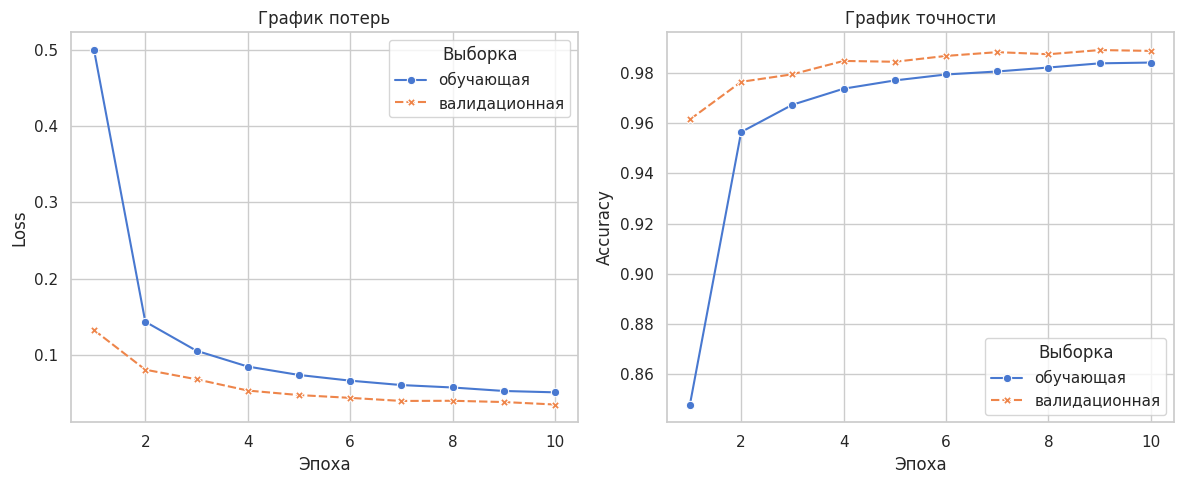

In [46]:
history_dict = history.history
epochs = list(range(1, len(history_dict['loss']) + 1))
sns.set(style="whitegrid", palette="muted")
loss_df = pd.DataFrame({
    'Эпоха': epochs * 2,
    'Loss': history_dict['loss'] + history_dict['val_loss'],
    'Выборка': ['обучающая'] * len(epochs) + ['валидационная'] * len(epochs)
})

acc_df = pd.DataFrame({
    'Эпоха': epochs * 2,
    'Accuracy': history_dict['accuracy'] + history_dict['val_accuracy'],
    'Выборка': ['обучающая'] * len(epochs) + ['валидационная'] * len(epochs)
})

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=loss_df, x='Эпоха', y='Loss', hue='Выборка',
             style='Выборка', markers=True, dashes=True)
plt.title('График потерь')
plt.subplot(1, 2, 2)
sns.lineplot(data=acc_df, x='Эпоха', y='Accuracy', hue='Выборка',
             style='Выборка', markers=True, dashes=True)
plt.title('График точности')
plt.tight_layout()

##Формирование таблицы результатов для проведения исследования
Cоздадим датафейм и запишем в него результаты обучения.

In [ ]:
import pandas as pd

experiment_1 = {
   "№ эксперимента":"1",
    "Модель": "CNN",
    "Архитектура": "Conv, Pool, Conv, Pool, Dropout, Flatten, D-10",
    "Кол-во слоев":"2 conv",
    "Функция активации":"relu",
    "Кол-во эпох":"10",
    "Точность": scores[1],
    "Потери": scores[0]
}

df = pd.DataFrame()
df = df._append(experiment_1, ignore_index=True)
df

,№ эксперимента,Модель,Архитектура,Кол-во слоев,Функция активации,Кол-во эпох,Точность,Потери
0,1,CNN,"Conv, Pool, Conv, Pool, Dropout, Flatten, D-10",2 conv,relu,10,0.9876,0.038169


: 

: 

: 

Модель CNN собрана, скомпилирована, обучена.

Построены кривые роста точности и уменьшения потерь по эпохам.

Получены матрица ошибок и метрики качества модели по отдельным цифрам.

Данные о проведённом эксперименте внесены в таблицу.

#Сравнение с моделью полносвязной нейронной сети.

##Построение двуслойной полносвязной нейронной сети
Создадим и обучим полносвязную модель с двумя слоями, количество эпох обучения 20. Функция активации - линейная.


In [ ]:
model = Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(64, input_shape=input_shape, activation='linear'))
model.add(layers.Dense(10, activation='softmax'))

batch_size = 200
epochs = 25
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/25
270/270 - 1s - loss: 0.4871 - accuracy: 0.8656 - val_loss: 0.3222 - val_accuracy: 0.9090 - 676ms/epoch - 3ms/step
Epoch 2/25
270/270 - 0s - loss: 0.2949 - accuracy: 0.9164 - val_loss: 0.2955 - val_accuracy: 0.9172 - 398ms/epoch - 1ms/step
Epoch 3/25
270/270 - 0s - loss: 0.2797 - accuracy: 0.9208 - val_loss: 0.2874 - val_accuracy: 0.9197 - 381ms/epoch - 1ms/step
Epoch 4/25
270/270 - 0s - loss: 0.2687 - accuracy: 0.9251 - val_loss: 0.2813 - val_accuracy: 0.9227 - 356ms/epoch - 1ms/step
Epoch 5/25
270/270 - 0s - loss: 0.2629 - accuracy: 0.9261 - val_loss: 0.2815 - val_accuracy: 0.9213 - 389ms/epoch - 1ms/step
Epoch 6/25
270/270 - 0s - loss: 0.2580 - accuracy: 0.9288 - val_loss: 0.2865 - val_accuracy: 0.9227 - 444ms/epoch - 2ms/step
Epoch 7/25
270/270 - 1s - loss: 0.2558 - accuracy: 0.9300 - val_loss: 0.2803 - val_accuracy: 0.9220 - 623ms/epoch - 2ms/step
Epoch 8/25
270/270 - 0s - loss: 0.2533 - accuracy: 0.9303 - val_loss: 0.2820 - val_accuracy: 0.9202 - 400ms/epoch - 1ms/step


: 

: 

: 

Построим графики потерь и точности обучения по эпохам


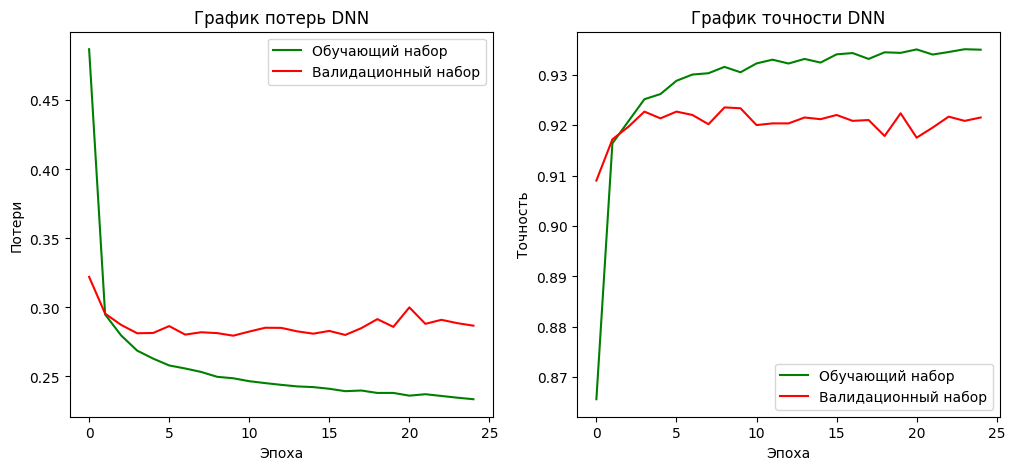

: 

: 

: 

In [ ]:
plt.figure(figsize=(12,5))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='green', label='Обучающий набор')
plt.plot(history.history['val_loss'], color='red', label='Валидационный набор')
plt.title('График потерь DNN')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='green', label='Обучающий набор')
plt.plot(history.history['val_accuracy'], color='red', label='Валидационный набор')
plt.title('График точности DNN')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

Внесём в датафейм результаты обучения на полносвязной сети.

In [ ]:
experiment_2 = {
    "№ эксперимента":"2",
    "Модель": "DNN",
    "Архитектура": "Flatten, D-64, D-10",
    "Кол-во слоев":"2",
    "Функция активации":"linear",
    "Кол-во эпох":"20",
    "Точность": scores[1],
    "Потери":scores[0]
}

df = df._append(experiment_2, ignore_index=True)
df

,№ эксперимента,Модель,Архитектура,Кол-во слоев,Функция активации,Кол-во эпох,Точность,Потери
0,1,CNN,"Conv, Pool, Conv, Pool, Dropout, Flatten, D-10",2 conv,relu,10,0.9876,0.038169
1,2,DNN,"Flatten, D-64, D-10",2,linear,20,0.9230,0.293509


: 

: 

: 

Как видим, на полобных задачах свёрточные нейросети обучаются значительно лучше, чем полносвязные.

Но, иследование ещё не окончено.